# Read and Analyze Data
Data : [National Survey of Family Growth](https://www.cdc.gov/nchs/nsfg/index.htm)

In [1]:
#import library
import pandas as pd
import numpy as np

In [6]:
filepath = 'data/hdf5/nsfg.hdf5'
nsfg_df = pd.read_hdf(filepath, 'nsfg')

In [11]:
nsfg_df.set_index('caseid', inplace=True)

In [12]:
nsfg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 60418 to 70619
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   outcome       9358 non-null   int64  
 1   birthwgt_lb1  6485 non-null   float64
 2   birthwgt_oz1  6391 non-null   float64
 3   prglngth      9358 non-null   int64  
 4   nbrnaliv      6485 non-null   float64
 5   agecon        9358 non-null   int64  
 6   agepreg       9109 non-null   float64
 7   hpagelb       6485 non-null   float64
 8   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 731.1 KB


In [13]:
nsfg_df.describe()

,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


## Cleaning and validating

In [17]:
nsfg_df['birthwgt_lb1'].replace([98,99], np.nan, inplace=True)

In [23]:
nsfg_df['birthwgt_oz1'].replace([98,99], np.nan, inplace=True)

In [24]:
nsfg_df['birthwgt_oz1'].value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
Name: birthwgt_oz1, dtype: int64

In [20]:
nsfg_df['nbrnaliv'].replace(8, np.nan, inplace=True)

In [25]:
nsfg_df['birth_weight'] = nsfg_df['birthwgt_lb1'] + nsfg_df['birthwgt_oz1'] / 16.0

In [21]:
import matplotlib.pyplot as plt

(array([2.000e+00, 1.500e+01, 1.500e+01, 2.900e+01, 2.600e+01, 5.200e+01,
        6.500e+01, 1.200e+02, 2.900e+02, 3.200e+02, 1.104e+03, 1.033e+03,
        1.375e+03, 8.630e+02, 5.730e+02, 3.060e+02, 9.200e+01, 4.200e+01,
        1.500e+01, 6.000e+00, 7.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  0.59791667,  1.19583333,  1.79375   ,  2.39166667,
         2.98958333,  3.5875    ,  4.18541667,  4.78333333,  5.38125   ,
         5.97916667,  6.57708333,  7.175     ,  7.77291667,  8.37083333,
         8.96875   ,  9.56666667, 10.16458333, 10.7625    , 11.36041667,
        11.95833333, 12.55625   , 13.15416667, 13.75208333, 14.35      ,
        14.94791667, 15.54583333, 16.14375   , 16.74166667, 17.33958333,
        17.9375    ]),
 <BarContainer object of 30 artists>)

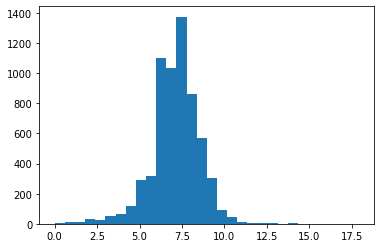

In [27]:
plt.hist(nsfg_df['birth_weight'].dropna(), bins=30)